In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "https://raw.githubusercontent.com/arya1dragneel/SCT_TrackCode_TaskNumber./refs/heads/main/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=";")  # The dataset uses ';' as a separator

# Display basic info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(None,
    age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop 'duration' since it leaks information
df = df.drop(columns=["duration"])

# Convert target variable 'y' to binary (yes -> 1, no -> 0)
df["y"] = df["y"].map({"yes": 1, "no": 0})

# Encode categorical variables using Label Encoding for simplicity
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", 
                    "contact", "month", "day_of_week", "poutcome"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future decoding

# Normalize numerical features (to improve model performance)
scaler = StandardScaler()
numerical_cols = ["age", "campaign", "pdays", "previous", "emp.var.rate", 
                  "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display cleaned data
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,7,1,3,1,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,7,1,3,0,2,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,0,1,1,0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,7,1,3,0,0,2,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/arya1dragneel/SCT_TrackCode_TaskNumber./refs/heads/main/bank-additional-full.csv", sep=";")

# Drop 'duration' since it leaks information
df = df.drop(columns=["duration"])

# Convert target variable 'y' to binary (yes -> 1, no -> 0)
df["y"] = df["y"].map({"yes": 1, "no": 0})

# Encode categorical variables using Label Encoding
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", 
                    "contact", "month", "day_of_week", "poutcome"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future decoding

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ["age", "campaign", "pdays", "previous", "emp.var.rate", 
                  "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save the cleaned data
df.to_csv("cleaned_bank_data.csv", index=False)

print("Data preprocessing complete. Cleaned dataset saved as 'cleaned_bank_data.csv'.")


Data preprocessing complete. Cleaned dataset saved as 'cleaned_bank_data.csv'.


DECISION TREE model

In [4]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [6]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_bank_data.csv")

# Split into features (X) and target (y)
X = df.drop(columns=["y"])
y = df["y"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")


Training size: (32950, 19), Testing size: (8238, 19)


In [7]:
# Create and train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [8]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8966

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.25      0.36       935

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238


Confusion Matrix:
[[7148  155]
 [ 697  238]]


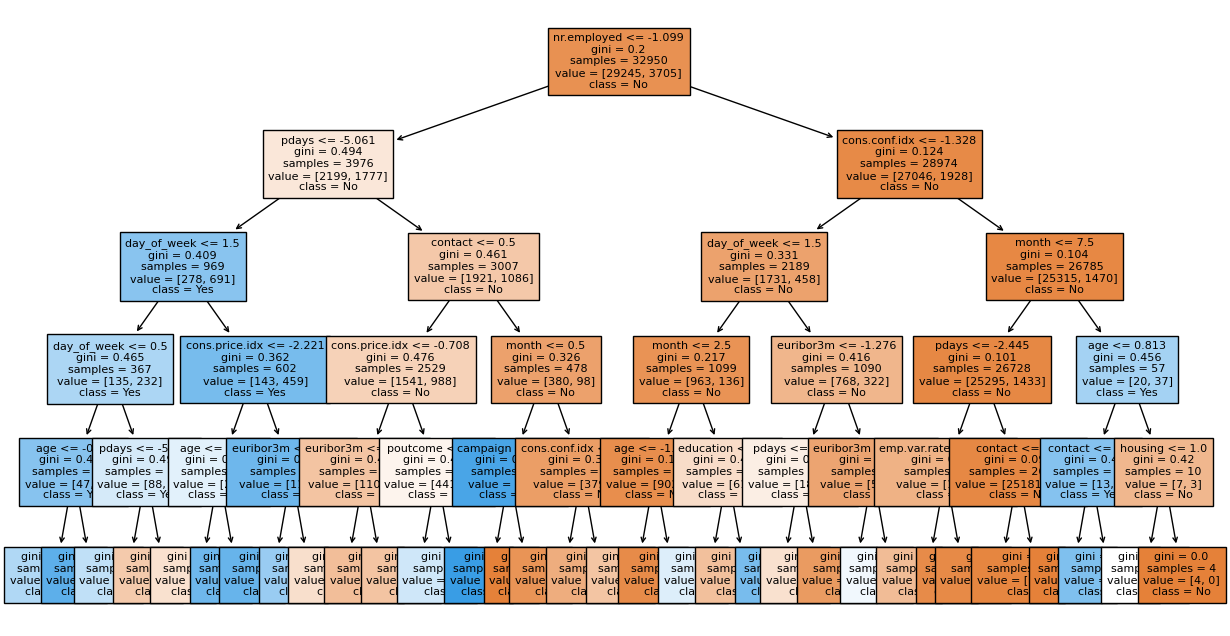

In [9]:
plt.figure(figsize=(15, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, fontsize=8)
plt.show()


To improve the Decision Tree Classifier's accuracy, we will use Hyperparameter Tuning with Grid Search and Cross-Validation.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [11]:
# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 10, 15],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 5],  
    "criterion": ["gini", "entropy"]  
}


In [12]:
# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [13]:
# Train with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred_optimized = best_model.predict(X_test)

# Evaluate Performance
from sklearn.metrics import accuracy_score, classification_report

print(f"Optimized Model Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Optimized Model Accuracy: 0.8971

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.26      0.36       935

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [14]:
#After hyperparameter tuning, we evaluated the optimized Decision Tree model. 

In [16]:
print(f"Optimized Model Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
#If accuracy is high (>80%), the model makes good predictions.
#If accuracy is low (<70%), the model may overfit (too complex) or underfit (too simple)

Optimized Model Accuracy: 0.8971


In [17]:
print(classification_report(y_test, y_pred_optimized))
#Precision: How many predicted "yes" (positive) were correct?
#Recall: How many actual "yes" cases did we capture?
#F1-score: Balance between precision and recall. Higher = better.
#If recall is low, the model misses many potential customers.
#If precision is low, we incorrectly predict customers will buy when they won’t.

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.26      0.36       935

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [20]:
print(confusion_matrix(y_test, y_pred_optimized))
#High FN → The model misses many real customers.
#High FP → The model targets non-interested customers (waste of resources).
#Balanced TN & TP? Great model


[[7148  155]
 [ 693  242]]


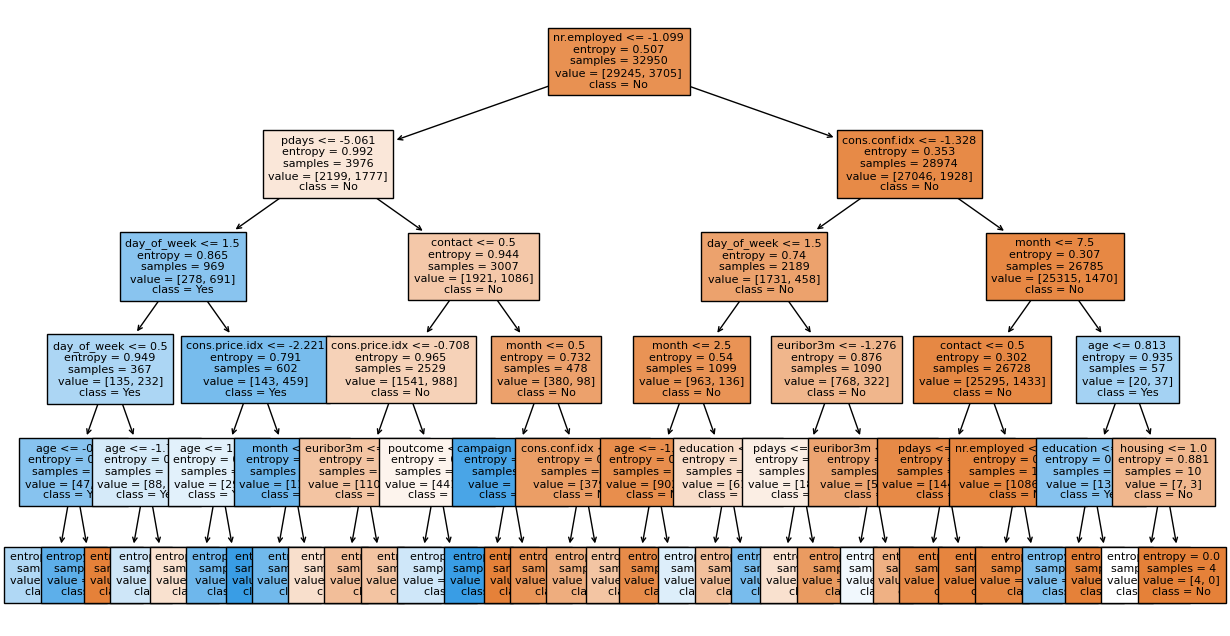

In [21]:
plt.figure(figsize=(15, 8))
tree.plot_tree(best_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, fontsize=8)
plt.show()
